In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn as sk
import random


/home/datta/anaconda3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
Using TensorFlow backend.


In [2]:
# The original dataset that was taken for the analysis
df_original = pd.read_csv('crop_production.csv')
df_original.head()
# The above dataset has a lot of NA values and hence another code was written to clean the dataset and a new csv was generated with no NA values
df_clean = pd.read_csv('TrimmedAgro.csv')
df_clean.head() # This csv was clean and without any NA values.

,Unnamed: 0,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,145299,Nagaland,PHEK,2006,Kharif,Cotton(lint),20.0,10.0
1,145322,Nagaland,PHEK,2007,Kharif,Cotton(lint),20.0,10.0
2,145347,Nagaland,PHEK,2008,Kharif,Cotton(lint),20.0,10.0
3,145353,Nagaland,PHEK,2008,Kharif,Moong(GreenGram),30.0,10.0
4,145372,Nagaland,PHEK,2008,Rabi,Urad,20.0,10.0


In [3]:
# Now that the clean data was achieved we group the data in order to seperate them from each other year and season wise.
# That csv will be called "final_group.csv"

# The code for the conversion:
subset = df_clean[['District_Name','Season','Crop_Year','Crop','Area','Production']]
df_grouped = subset.groupby(['District_Name','Season','Crop_Year'], as_index = False)
tuples = [tuple(x) for x in subset.values]



with open("final_group.csv","w") as f:
    for name, group in df_grouped:
        group.sort_values('Crop_Year', ascending = True).to_csv(f,header = False)

In [4]:
# Now the first important step would be to find the linearity in the dataset and we start with the basic linear regression model.

# The dataset is very huge. It has about 1.5million records.
# Performing regression on all of them is not feasible so we will apply it to only a sample of the dataset just to see whether the datste is normal or not.
# In the particular analysis we will try to see if the Area and Production in the dataset share any relation in the dataset at all.

# Linear regression is the method by which we predict a dependent variable with respect to an independent variable.
# Two variables are linearly related if the independen variable can predict the dependent variable as accurately as possible given the function.

# First we arrange the area and production in ascending order.
df_clean = df_clean.sort_values('Area')

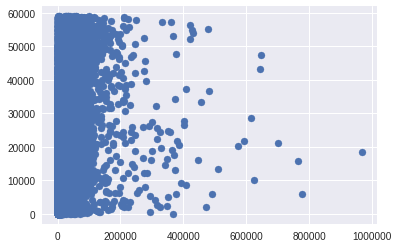

In [5]:
plt.scatter(df_clean['Area'],df_clean['Production'])
# As we can see from the plt below the dataset is not at all linear.

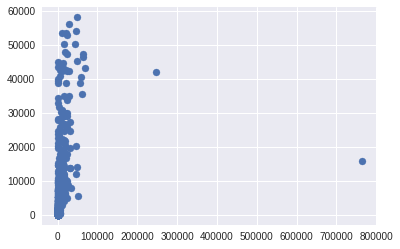

In [6]:
# Now if we test with a sample it would be more conclusive
df_sample = df_clean.sample(1000)

plt.scatter(df_sample.Area, df_sample.Production)

# As we can see that the data is not linear at all

# Now we can still go ahead and find the line of best fit for the given data.

The estimated coefficients = 
b_0 = -0.16252223966421298 \ nb_1 = 1.1114485209415128


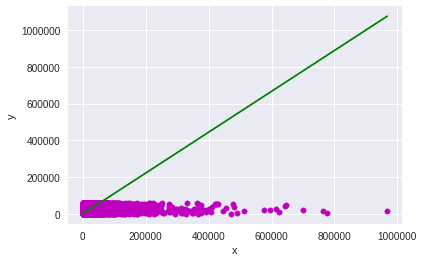

In [7]:
# h(x_i) = \beta _0 + \beta_1x_i - The equation to get the line of best fit

# Now we write the functions to get the coeffiecients
def estimate_coeff(x, y):
    # get the size
    n = np.size(x)
    
    # The means of x and y
    m_x, m_y = np.mean(x), np.mean(y)
    
    # Calculating the deviations
    SS_xy = np.sum(y*x - n*m_y*m_x)
    SS_xx = np.sum(x*x - n*m_x*m_x)
    
    # Calculating the regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
    
    return(b_0, b_1)

# Function to plot the line of best fit
def plot_regression_line(x, y, b):
    
    # Plot the actual data
    plt.scatter(x, y, color = "m", marker="o", s = 30)
    
    # Predicted vector
    y_pred = b[0] + b[1]*x
    
    # plt the regression line
    plt.plot(x, y_pred, color = "g")
    
    # Labels
    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.show()
    return y_pred
    
# Now we call the functions on our dataset

x = np.array(list(df_clean.Area))
y = np.array(list(df_clean.Production))
estimate = estimate_coeff(x, y)

print("The estimated coefficients = \nb_0 = {} \ nb_1 = {}". format(estimate[0], estimate[1]))

y_pred = plot_regression_line(x, y, estimate)

df_clean['Predicted'] = y_pred
# print(df_clean.head())

# To see it in a csv format execute the code below by uncommenting it
# df_clean.to_csv("Predicted.csv")
# As seen from the  given plot the line of best fit is way off from the original values and no way related to just area hance we reject the model.



In [8]:
# Now we shall try the decision tree approach for the continuous variable
import sys
sys.path.append('/home/datta/Documents/5th Sem/DataAnalytics/Project/Final_Project_Codes')
from AgroPredictor import DataPreProcessing


district_dictionary = DataPreProcessing.NNFriendly()
df_decision_tree = pd.read_csv('NNF.csv')
df_decision_tree.head()
df_decision_tree = df_decision_tree.drop('Unnamed: 0', axis = 1)
# Now we try to assign the correct district name given the crop area and prodction.
x = df_decision_tree.drop('Crop', axis = 1)
y = df_decision_tree['Crop']
x

,Production,Area,District_Name
0,10.0,20.0,1
1,10.0,20.0,1
2,10.0,20.0,1
3,10.0,30.0,1
4,10.0,20.0,1
5,10.0,20.0,1
6,10.0,20.0,1
7,10.0,20.0,1
8,10.0,20.0,1
9,10.0,10.0,1


In [9]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split


regressor = DecisionTreeRegressor()


regressor.fit(x, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [10]:
user_input = input("Enter the area, production and district name separated by commas: ")
input_list = user_input.split(',')
numbers = [int(x.strip()) for x in input_list]
for key, value in district_dictionary.items():
    if numbers[2] == value:
        print(key)
y_pred = regressor.predict([numbers])
print(y_pred)

# As we can see that the prediction of the crop based on are , production and district is really good for which crop van be planted we can use decision trees, but only to a certain extent.


Enter the area, production and district name separated by commas: 53353,45345,6
BALANGIR
[ 28.]


In [76]:
# Now with the help of the given dataset we will list out the top 5 crops for each of the state across all districts.
# Based on the area and production of the crops in different districts of the state.
state_name = input("Enter The state name:")
df_clean['State_Name'] = df_clean.State_Name.str.lower()
df_statewise = df_clean[df_clean.State_Name == state_name]

Enter The state name:arunachal pradesh


In [77]:
df_cropwise = pd.DataFrame(df_statewise.groupby(by = ['Crop'])['Area'].sum())
df_crops = pd.DataFrame(df_statewise.groupby(by = ['Crop','Crop_Year'])['Area'].sum())

df_cropwise = df_cropwise.sort_values('Area', ascending=False)
# The above gives the total production of different crops over all the years and all seasons.
df_cropwise.head(5)

,Area
Crop,
Rice,2209673.0
Maize,751806.0
Oilseeds total,626828.0
Small millets,387454.0
Dry ginger,96637.0
